<a href="https://colab.research.google.com/github/karinaamaha/UTS-LAB-1-Basis-Data/blob/main/Copy_of_Emotion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [1]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

## Assigning Path for Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
TRAIN_DIR = "/content/drive/MyDrive/uas_ai/train"
TEST_DIR = "/content/drive/MyDrive/uas_ai/test"
BATCH_SIZE=64

### Will see how many categories and images present

In [4]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1922 in folder Happiness
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Sadness
For training data, found 1922 in folder Surprise
For training data, found 1896 in folder Anger
For training data, found 1894 in folder Disgust


In [5]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 241 in folder Sadness
For testing data, found 241 in folder Fear
For testing data, found 237 in folder Anger
For testing data, found 241 in folder Happiness
For testing data, found 249 in folder Surprise
For testing data, found 237 in folder Disgust


### Will see some random images withe their labels

In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [7]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


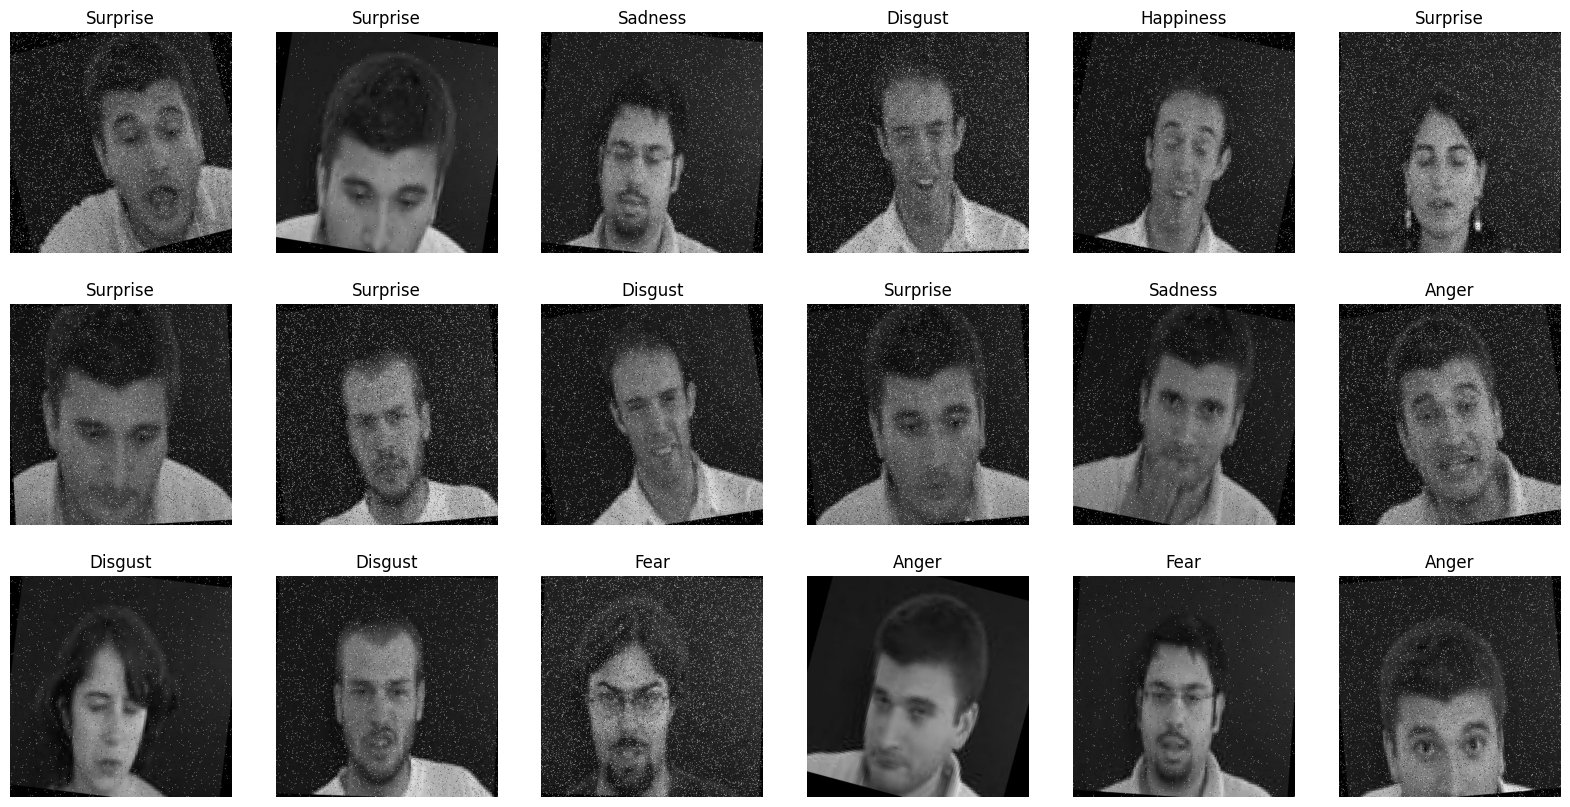

In [8]:
plt.figure(figsize=(20, 10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/MyDrive/uas_ai/train/", target_class=class_name)
    

### Preparing data for training

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 11478 images belonging to 6 classes.
Found 1446 images belonging to 6 classes.


### Basic model building (CNN Classifier)

In [10]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
## model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
history = classifier.fit(training_set,
                         epochs = 200,
                         steps_per_epoch=20,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/200
20/20 [==============================] - 806s 41s/step - loss: 1.9743 - accuracy: 0.1891 - val_loss: 1.8046 - val_accuracy: 0.1701
Epoch 2/200
20/20 [==============================] - 313s 16s/step - loss: 1.7889 - accuracy: 0.1875 - val_loss: 1.7892 - val_accuracy: 0.1985
Epoch 3/200
20/20 [==============================] - 257s 13s/step - loss: 1.7860 - accuracy: 0.2133 - val_loss: 1.7810 - val_accuracy: 0.2642
Epoch 4/200
15/20 [=====================>........] - ETA: 54s - loss: 1.7797 - accuracy: 0.2396 

In [ ]:
model = tf.keras.models.Sequential()

# Menyimpan model ke dalam file
model.save('model1.h5')

# Mengunduh file model
files.download('model1.h5')
print("Sudah Terdownload")

ValueError: ignored

### Evaluating the model

In [ ]:
classifier.evaluate(test_set)

23/23 [==============================] - 8s 365ms/step - loss: 0.6349 - accuracy: 0.7759


[0.6349138021469116, 0.7759336233139038]

Text(0, 0.5, 'Loss')

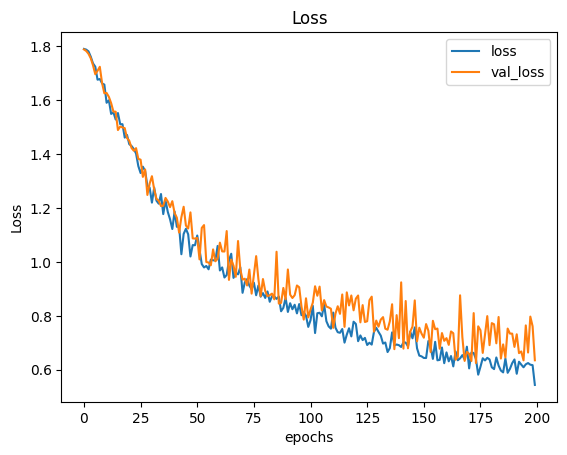

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

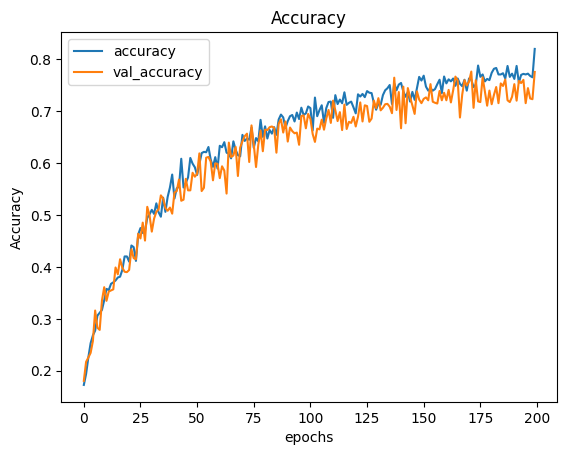

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [ ]:
model_path = "model.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("https://drive.google.com/file/d/1rh0hKt1jO1dv_pw-7ExIS1D4wTwenoie/view?usp=sharing")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

OSError: ignored

In [ ]:
training_set.class_indices